# Voici une analyse de l'activité criminelle de la ville de Montréal. Cette analyse répond aux questions suivantes:

À quel moment de la journée les méfaits sont-ils commis?
Quel est le nombre de crime selon chaque catégorie?
Quel jour de la semaine y a-t-il le plus de crime?
Dans quel trimeste de l'année les crimes sont-ils le plus courant?
Le COVID-19 a-t-il eu un impact sur la criminalité durant le mois de Mars?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

actes_criminels = pd.read_csv("interventionscitoyendo.csv", delimiter=",", parse_dates=["DATE"])

#  À quel moment de la journée les crimes sont-ils le plus commis?

       CATEGORIE
QUART           
jour       82111
nuit       24750
soir       57186


Text(0.5, 1.0, 'À quel moment de la journée les crimes sont-ils le plus commis?')

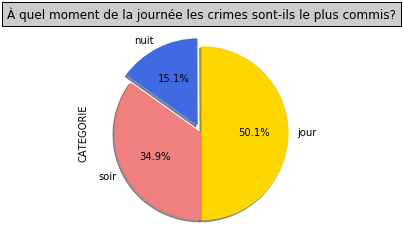

In [3]:
#on calcule le nombre de crime selon la période du jour reportée dans le fichier
heure_crime = actes_criminels[["QUART","CATEGORIE"]].groupby("QUART").count()

print(heure_crime)

#On établit les paramètres nécessaires pour la mise en page du graphique
colors = ["gold", "royalblue", "lightcoral"]
explode = (0,0.1,0)

#On crée le graphique et son titre
heure_crime.plot.pie(subplots = True, legend=None, colors=colors, autopct="%1.1f%%", shadow=True, explode=explode, startangle = 270)
plt.title("À quel moment de la journée les crimes sont-ils le plus commis?", bbox={"facecolor":"0.8","pad":5})


# Quel est le nombre de crime selon chaque catégorie?

                                       
CATEGORIE                              
Infractions entrainant la mort      133
Introduction                      45020
Mefait                            36936
Vol dans / sur vehicule a moteur  49248
Vol de vehicule a moteur          23022
Vols qualifies                     9688


Text(0.5, 1.0, 'Quels sont les actes criminels les plus courants?')

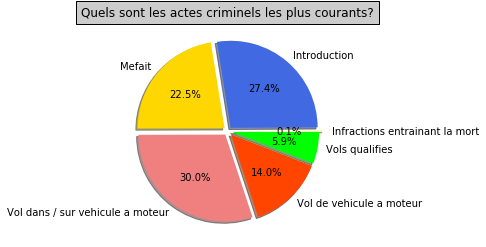

In [192]:
#On fait le total des crimes selon leur catégorie
actes_criminels[""] = ""
crime_categorie = actes_criminels[["CATEGORIE", ""]].groupby("CATEGORIE").count()

print(crime_categorie)

#On établit les paramètres nécessaires pour la mise en page du graphique
colors = ["yellow", "royalblue", "gold","lightcoral", "orangered", "lime"]
explode = (0.1,0.05,0.05,0.05,0.05,0.05)

#on crée le graphique et son titre
crime_categorie.plot.pie(subplots = True, legend = False,colors=colors, autopct="%1.1f%%", shadow=True, explode=explode,startangle = 0)
plt.title("Quels sont les actes criminels les plus courants?", bbox={"facecolor":"0.8","pad":5})

# Quel jour de la semaine y a-t-il le plus de crime?

            CATEGORIE
JOUR_CRIME           
Monday          26160
Tuesday         24154
Wednesday       24576
Thursday        23920
Friday          23787
Saturday        20679
Sunday          20771


Text(0.5, 1.0, 'Quel jour de la semaine y a-t-il le plus de crime?')

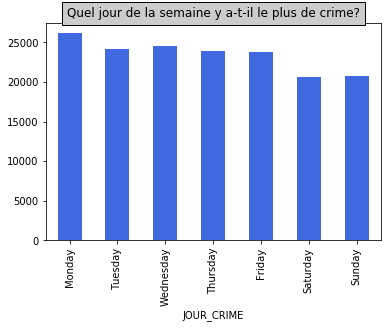

In [191]:
#On groupe ici le nombre de crime par jour de la semaine, et on les ordonne
actes_criminels["JOUR_CRIME"] = actes_criminels.DATE.dt.day_name()
ordre = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
crime_par_jour = actes_criminels[["CATEGORIE", "JOUR_CRIME"]].groupby("JOUR_CRIME").count().loc[ordre]

print(crime_par_jour)

#Pour cette statistique, on crée un diagramme à bandes et son titre
crime_par_jour.plot.bar(legend = None, color = "royalblue")
plt.title("Quel jour de la semaine y a-t-il le plus de crime?", bbox={"facecolor":"0.8","pad":5})

# Dans quel trimeste de l'année les crimes sont-ils le plus courant?

                        
TRIMESTE_CRIME          
1               0.254189
2               0.240273
3               0.256561
4               0.248977


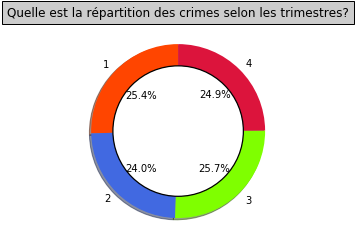

In [143]:
#On calcule le pourcentage de crime commis par quart de l'année
actes_criminels["TRIMESTE_CRIME"] = actes_criminels.DATE.dt.quarter
crime_par_trimestre = actes_criminels[["", "TRIMESTE_CRIME"]].groupby("TRIMESTE_CRIME").count()/len(actes_criminels)

print(crime_par_trimestre)

#On établit les paramètres nécessaires pour la mise en page du graphique
colors = ["orangered", "royalblue", "chartreuse","crimson"]

#On crée un graphique circulaire et son titre
crime_par_trimestre.plot.pie(subplots = True, legend = False, colors=colors, autopct="%1.1f%%", shadow=True, startangle = 90)
plt.title("Quelle est la répartition des crimes selon les trimestres?", bbox={"facecolor":"0.8","pad":5})

#On crée le cercle utilisé pour convertir le graphique circulaire en un graphique à anneau
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
diagram = plt.gcf()
diagram.gca().add_artist(centre_circle)

# Le COVID-19 a-t-il eu un impact sur la criminalité durant le mois de Mars?

       CRIMES_MARS
ANNEE             
2015          2867
2016          2662
2017          2610
2018          2311
2019          2179
2020          1911


Text(0.5, 1.0, 'Le COVID-19 a-t-il eu un impact sur les crimes en Mars?')

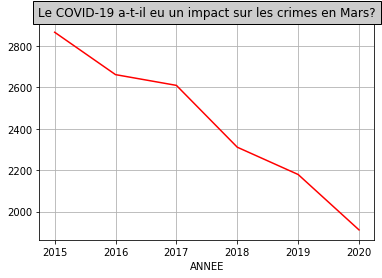

In [138]:
#On groupe tout les crimes qui se produisent durant le mois de Mars, pour chaque année
actes_criminels["CRIMES_MARS"] = actes_criminels.DATE.dt.month_name()
actes_criminels["ANNEE"] = actes_criminels.DATE.dt.year
colonnes = actes_criminels[["CRIMES_MARS", "ANNEE"]]

covid_crime = colonnes.loc[colonnes["CRIMES_MARS"] == "March"].groupby("ANNEE").count()

print(covid_crime)

#Pour cette statistique, on crée un diagramme à ligne brisée et son titre
covid_crime.plot(legend = False, color = "r", grid= True)
plt.title("Le COVID-19 a-t-il eu un impact sur les crimes en Mars?", bbox={"facecolor":"0.8","pad":5})